In [4]:
# -*- coding: UTF-8 -*-
import os,dlib,glob,numpy
from skimage import io#引入skimage模块可用

# 1.人脸关键点检测器
predictor_path = "C:/Users/13750/Desktop/shape_predictor_68_face_landmarks.dat"#是已经训练好的人脸关键点检测器。
# 2.人脸识别模型
face_rec_model_path = "C:/Users/13750/Desktop/dlib_face_recognition_resnet_model_v1.dat"#是训练好的ResNet人脸识别模型。
#ResNet是何凯明在微软的时候提出的深度残差网络，获得了 ImageNet 2015 冠军，通过让网络对残差进行学习，在深度和精度上做到了比 CNN 更加强大。
#http://dlib.net/files/。
# 3.候选人脸文件夹
faces_folder_path = "C:/Users/13750/Desktop/candidate"
# 4.需识别的人脸
img_path = "C:/Users/13750/Desktop/OFD_full_DB_labelled/OFD_full_DB_labelled/0006/光照/I_0006_04.jpg"

# 1.加载正脸检测器
detector = dlib.get_frontal_face_detector()
# 2.加载人脸关键点检测器
predictor = dlib.shape_predictor(predictor_path)
# 3. 加载人脸识别模型
facerec = dlib.face_recognition_model_v1(face_rec_model_path)

win = dlib.image_window()

# 候选人脸描述子list
descriptors = []

# 对文件夹下的每一个人脸进行:
# 1.人脸检测
# 2.关键点检测
# 3.描述子提取
for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):#返回candidate文件下所有jpg文件
    print("Processing file: {}".format(f))#Format是CString类的一个成员函数，它通过格式操作使任意类型的数据转换成一个字符串。
#Format参数也是一个格式化字符串。
    img = io.imread(f)#使用scikit-image包的io模块读取图像
    #io.imread（fname，as_grey=True）函数，第一个参数为图片路径，第二个参数为as_grey, bool型值，默认为False
    #生成dlib的图像窗口
    win.clear_overlay()
    win.set_image(img)
    # 1.人脸检测
    dets = detector(img, 1)
    print("Number of faces detected: {}".format(len(dets)))#Len():得到字符串的长度
    for k, d in enumerate(dets):
        #enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
        # 2.关键点检测
        shape = predictor(img, d)
        # 画出人脸区域和和关键点
        win.clear_overlay()
        win.add_overlay(d)  
        win.add_overlay(shape)
        # 3.描述子提取，存储为128D向量(八个方向数据,每个方向含4x4个分量)？？？？
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        # 转换为numpy array
        #print(face_descriptor)
        #print(len(face_descriptor))
        v = numpy.array(face_descriptor)  
        descriptors.append(v)#append按行合并列表#append() 方法用于在列表末尾添加新的对象。

Processing file: C:/Users/13750/Desktop/candidate\1.jpg
Number of faces detected: 1
Processing file: C:/Users/13750/Desktop/candidate\2.jpg
Number of faces detected: 1
Processing file: C:/Users/13750/Desktop/candidate\3.jpg
Number of faces detected: 1
Processing file: C:/Users/13750/Desktop/candidate\4.jpg
Number of faces detected: 1
Processing file: C:/Users/13750/Desktop/candidate\5.jpg
Number of faces detected: 1
Processing file: C:/Users/13750/Desktop/candidate\陌生人.jpg
Number of faces detected: 1


In [10]:
#type(face_descriptor)
#print(descriptors)

In [5]:
# 对需识别人脸进行同样处理
# 提取描述子
img = io.imread(img_path)
dets = detector(img, 1)
dist = []
for k, d in enumerate(dets):
    shape = predictor(img, d)
    face_descriptor = facerec.compute_face_descriptor(img, shape)
    d_test = numpy.array(face_descriptor) 
# 计算欧式距离
for i in descriptors:
    dist_ = numpy.linalg.norm(i-d_test)#表示范数，范数是对向量（或者矩阵）的度量，是一个标量
    dist.append(dist_)
# 候选人名单
candidate = ['1','2','3','4','5','陌生人']
# 候选人和距离组成一个dict
c_d = dict(zip(candidate,dist))
cd_sorted = sorted(c_d.items(), key=lambda d:d[1])
#sort 是应用在 list 上的方法，sorted 可以对所有可迭代的对象进行排序操作。
#list 的 sort 方法返回的是对已经存在的列表进行操作，无返回值，而内建函数 sorted 方法返回的是一个新的 list，而不是在原来的基础上进行的操作。
print ("\n The person is: ",cd_sorted[0][0])
#输出（距离最小的）第一个人
dlib.hit_enter_to_continue()
#直到使用者输入enter键继续或暂停


 The person is:  陌生人


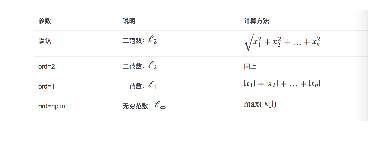

D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


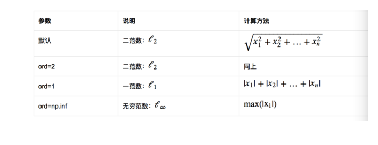

In [8]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

lena = mpimg.imread('C:/Users/13750/Desktop/范数.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
lena.shape #(512, 512, 3)

plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
#对图像进行放缩
from scipy import misc
lena_new_sz = misc.imresize(lena,0.5) # 第二个参数如果是整数，则为百分比，如果是tuple，则为输出图像的尺寸
plt.imshow(lena_new_sz)
plt.axis('off')
plt.show()

注：以上代码摘录于博客，并进行了一些修改。 
原码出处：《40行代码的人脸识别实践》作者：刘潇龙
原文链接：https://cloud.tencent.com/developer/article/1004781